# Introdução a Ciência de Dados 

## Parte 1
Nos próximos exercícios utilizaremos um dfset com 13 variáveis de entrada e 1 variável de saída (num). O dfset pode ser encontrado no arquivo "clv_heart_disease.csv".
Existem valores faltantes nesse dfset, representados pelo caractere "?".


In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


## Estratégias para dados ausentes

- a) Crie uma lista com o nome das variáveis numéricas e uma com o nome das variáveis categóricas
* b) **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média.

- c) **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia da moda (valor mais frequente).


In [3]:
df = pd.read_csv('/home/jpirolla/Documentos/Documents/USP/ICD/p1_impar/clv_heart_disease.df', na_values='?')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


a) Nome das variáveis numéricas e categóricas

In [11]:
variaveis_numericas = df.select_dtypes(include=['number']).columns.tolist()
variaveis_numericas

['Unnamed: 0',
 'age',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'oldpeak',
 'ca',
 'num']

In [12]:
variaveis_categoricas = df.select_dtypes(exclude=['number']).columns.tolist()
variaveis_categoricas

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

b) Valores faltantes com média 

In [9]:
numerical_imputer = SimpleImputer(strategy='median')
df[variaveis_numericas] = numerical_imputer.fit_transform(df[variaveis_numericas])
df[variaveis_numericas]

,Unnamed: 0,age,trestbps,chol,fbs,thalach,oldpeak,ca,num
0,0.0,63.0,145.0,233.0,133.051002,150.0,2.3,0.0,0.0
1,1.0,67.0,160.0,286.0,106.803350,108.0,1.5,3.0,1.0
2,2.0,67.0,120.0,229.0,105.341447,129.0,2.6,2.0,1.0
3,3.0,37.0,130.0,250.0,102.194825,187.0,3.5,0.0,0.0
4,4.0,41.0,130.0,204.0,110.926185,172.0,1.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...
298,298.0,45.0,110.0,264.0,114.129098,132.0,1.2,0.0,1.0
299,299.0,68.0,144.0,193.0,131.664016,141.0,3.4,2.0,1.0
300,300.0,57.0,130.0,131.0,109.655227,115.0,1.2,1.0,1.0
301,301.0,57.0,130.0,236.0,105.952547,174.0,0.0,1.0,1.0


c) Valores faltantes com moda

In [10]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[variaveis_categoricas] = categorical_imputer.fit_transform(df[variaveis_categoricas])
df[variaveis_categoricas]

,sex,cp,restecg,exang,slope,thal
0,male,Typical Angina,Left ventricular hypertrophy,no,Downsloping,Fixed defect
1,male,Asymptomatic,Left ventricular hypertrophy,yes,Flat,Normal
2,male,Asymptomatic,Left ventricular hypertrophy,yes,Flat,Reversable defect
3,male,Non-anginal pain,Normal,no,Downsloping,Normal
4,female,Atypical Angine,Left ventricular hypertrophy,no,Upsloping,Normal
...,...,...,...,...,...,...
298,male,Typical Angina,Normal,no,Flat,Reversable defect
299,male,Asymptomatic,Normal,no,Flat,Reversable defect
300,male,Asymptomatic,Normal,yes,Flat,Reversable defect
301,female,Atypical Angine,Left ventricular hypertrophy,no,Flat,Normal


## Visualização de outliers


Entre os atributos numericos presentes nesta base de dados, existe alguns que possuem outliers? Justifique sua resposta.

R: Para podermos verificar se existem atributos numéricos que possuem outliers podemos analiser se existem valores que estão fora da cerca limitante (dada por 1,5*IQ, onde IQ é a distância interquartil) ou mesmo realizar uma visualização direta com o uso de boxplots.

Filtragem do dfset recorrendo à cerca limitante superior ou inferior 

In [76]:
for coluna in variaveis_numericas:
    # Calcule Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna específica
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    
    # Calcule o intervalo interquartil (IQR)
    IQR = Q3 - Q1
    
    # Defina os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar valores que estão dentro do intervalo [limite_inferior, limite_superior]
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

    valores_superiores = sum(df[coluna] > limite_superior)
    valores_inferiores = sum(df[coluna] < limite_inferior)
    
    # Imprimir os resultados
    print(f'{coluna}: contém {valores_superiores} valores superiores e {valores_inferiores} valores inferiores aos limites.\n')

NameError: name 'variaveis_numericas' is not defined

### Boxplots

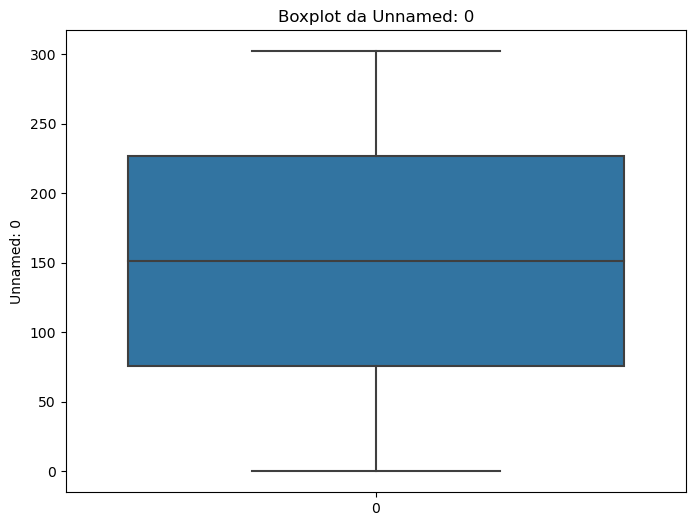

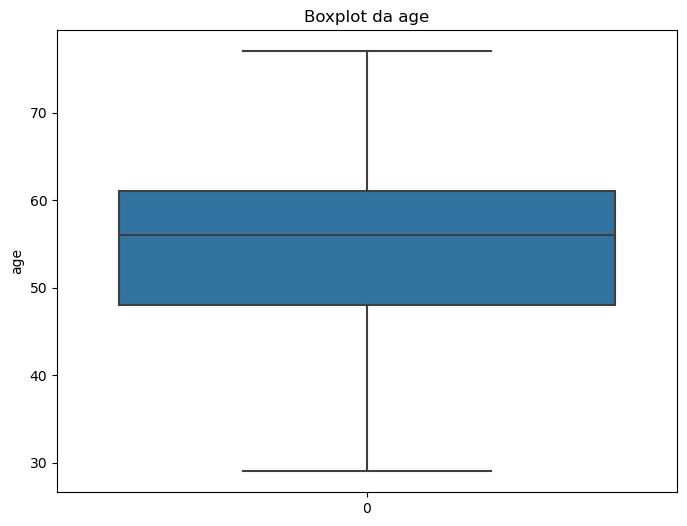

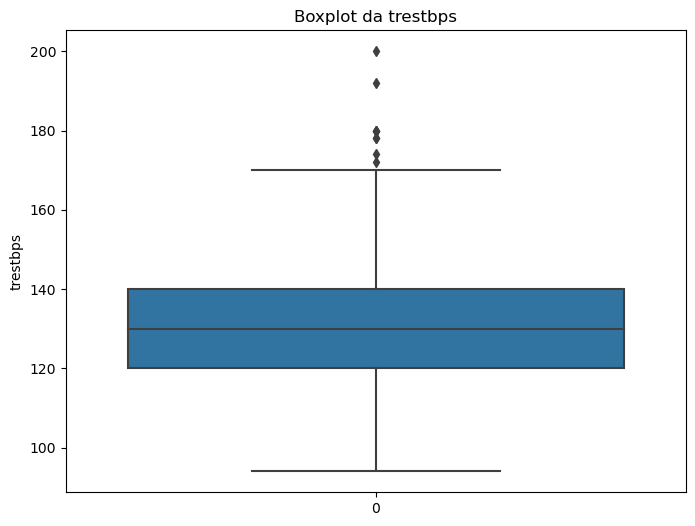

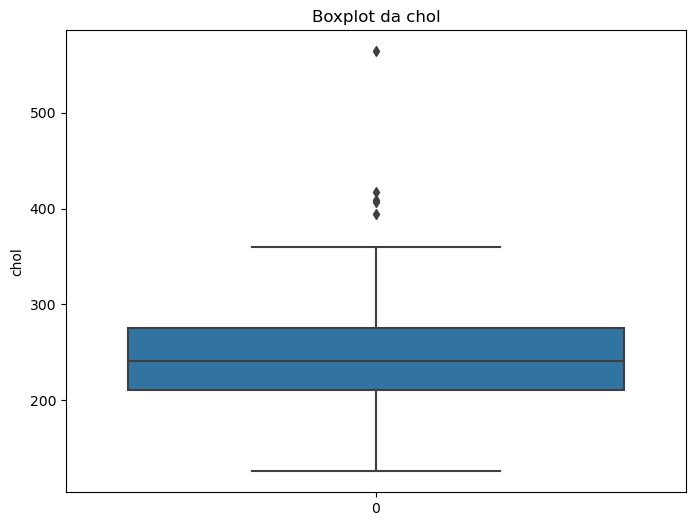

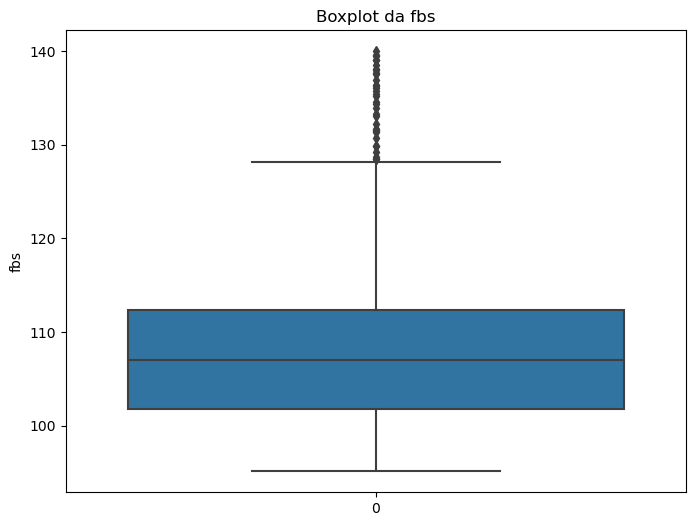

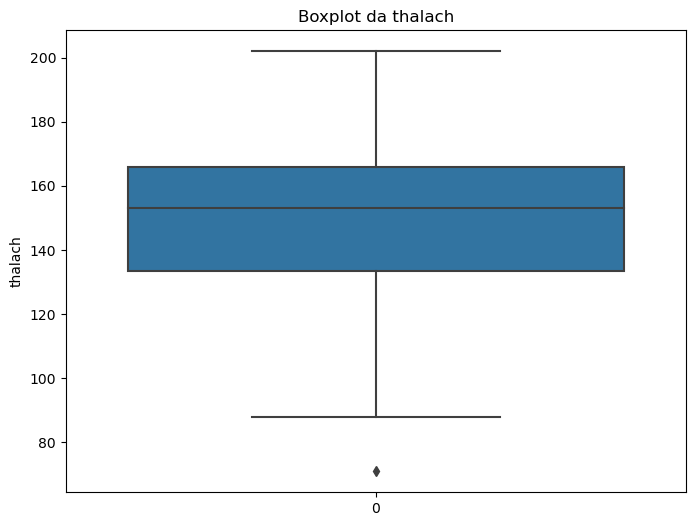

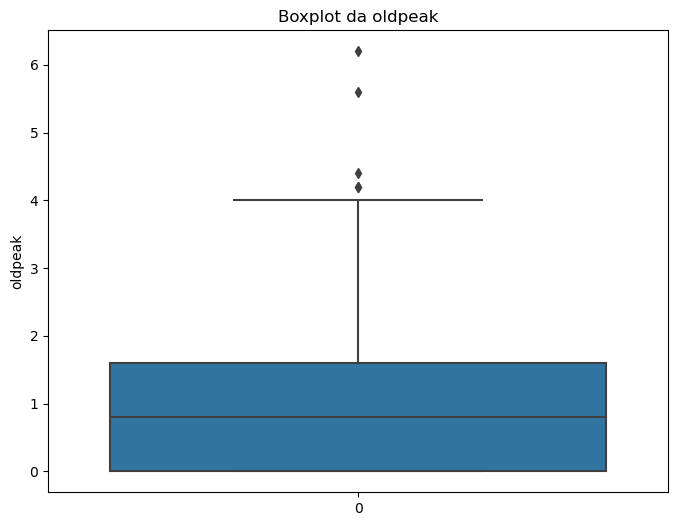

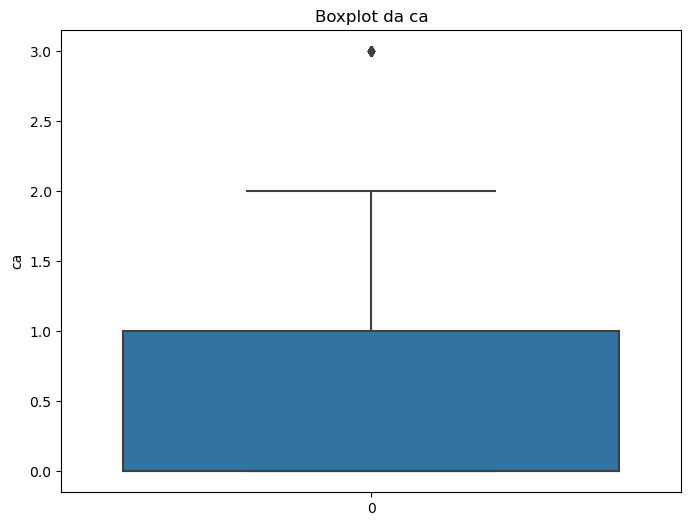

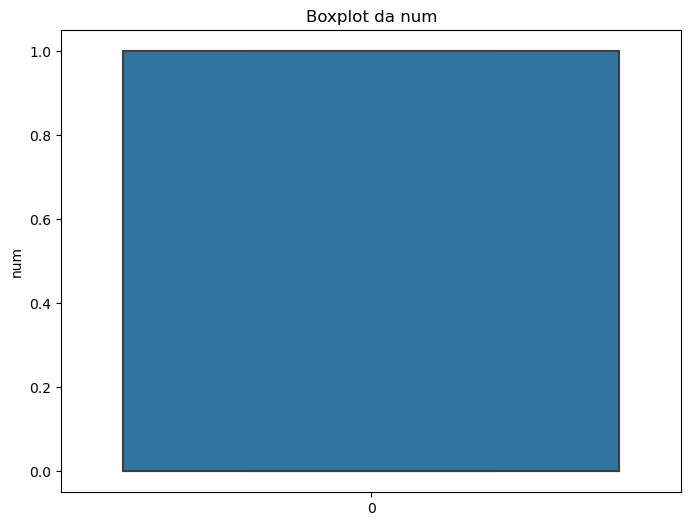

In [18]:
for coluna in variaveis_numericas:
    # Calcule Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna específica
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    
    # Calcule o intervalo interquartil (IQR)
    IQR = Q3 - Q1
    
    # Defina os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Plotar o boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[coluna])
    plt.title(f'Boxplot da {coluna}')
    plt.ylabel(coluna)
    plt.show()



Dessa forma, verificamos que as colunas trestbps,chol, fbs, thalach, oldpeak e ca possuem outliers, já que estão fora do limite estabelecido pelo cálculo das cercas superiores e inferiores. 

## Momentos
 Considerando o atributo **chol**, responda:
- a) Qual é a media de cholestorol que esta amostra apresenta?
- b) Calcule os 4 momentos e comente os valores observados. Indique em qual faixa de valores a maioria de pessoas desta amostra está  incluída.

a) média colesterol

In [77]:
media_colesterol = df['chol'].mean()
print(f'A média de colesterol que a amostra apresenta é {media_colesterol:.3f}')

NameError: name 'df' is not defined

b) Feixa de valores

In [78]:
media_colesterol = df['chol'].mean()
variancia_colesterol = df['chol'].var()
assimetria_colesterol = df['chol'].skew()
curtose_colesterol = df['chol'].kurtosis()

NameError: name 'df' is not defined

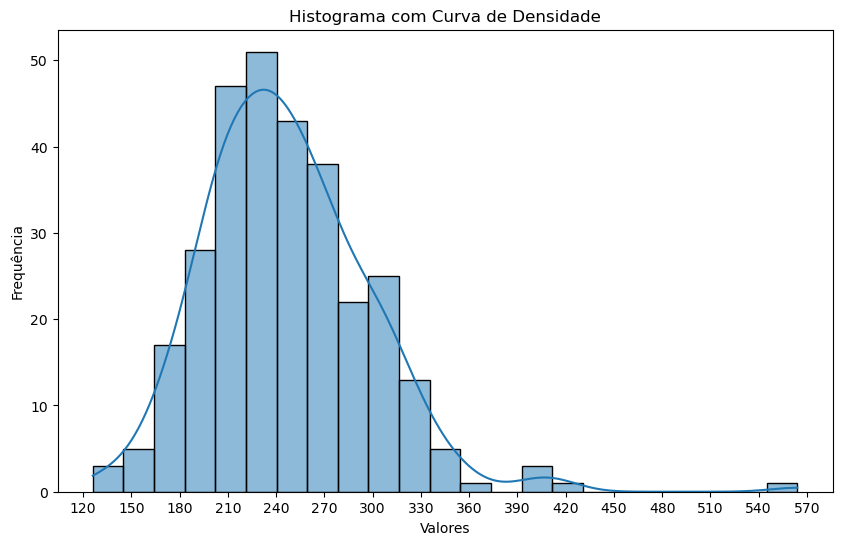

In [37]:

# Criar um histograma com a curva de densidade sobreposta
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True)  # kde=True adiciona a curva de densidade
plt.title('Histograma com Curva de Densidade')
plt.xlabel('Valores')
plt.ylabel('Frequência')

intervalo = 30
min_chol = int(min(df['chol']) // intervalo * intervalo)
max_chol = int((max(df['chol']) // intervalo + 1) * intervalo)
plt.xticks(range(min_chol, max_chol + 1, intervalo))
plt.show()

# Parte 2

O dfset "Breast Cancer Wisconsin" é um dfset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dfset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

## Dados ausentes e preparo para aplicação do PCA
- a) Remova os dados faltantes que aparece neste conjunto como "?" (1 pt)
- b) Reduza o número de atributos escolhendo os 3 mais relevantes. Justifique sua resposta. (1 pt)
- c) Comente a distribuição dos valores de **um** dos atributos selecionados. Escolha uma forma de visualização (ex: histograma ou boxplot) (1 pt)
- d) Calcule a obliquidade para uma das 3 variáveis mais relevantes e comente. (1 pt)

In [79]:
df2 = pd.read_csv('/home/jpirolla/Documentos/Documents/USP/ICD/p1_impar/breast-cancer-wisconsin.data', na_values='?')
df2.head()

,id,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


a) removendo 

In [80]:
# Supondo que seu DataFrame seja chamado df
df2.replace('?', pd.NA, inplace=True)  # Substituir "?" por NaN
df2.dropna(inplace=True) 

b) reduzir

In [81]:
# Calcular a matriz de correlação
correlacao = df2.corr()
correlacao

,id,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
id,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
u_cell_size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
u_cell_shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marg_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
epi_cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chrom,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
norm_nucl,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


<Axes: >

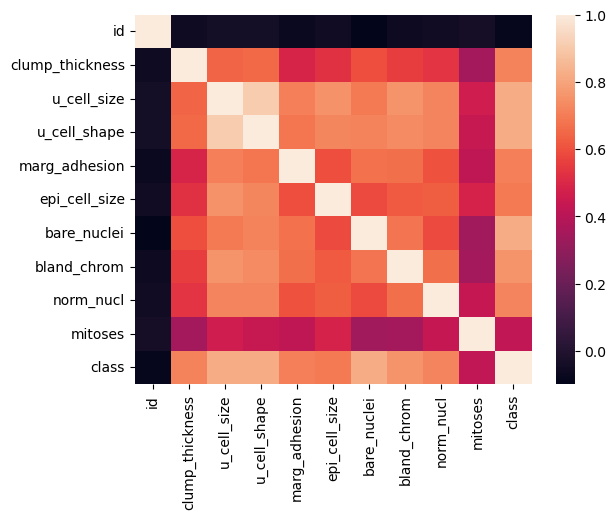

In [82]:
sns.heatmap(correlacao)

In [83]:
df_maiores_corr = df2[['u_cell_shape', 'bare_nuclei', 'bland_chrom']]
df_maiores_corr

,u_cell_shape,bare_nuclei,bland_chrom
0,1,1.0,3
1,4,10.0,3
2,1,2.0,3
3,8,4.0,3
4,1,1.0,3
...,...,...,...
694,1,2.0,1
695,1,1.0,1
696,10,3.0,8
697,6,4.0,10


In [84]:
# Selecionar os 3 atributos mais correlacionados com as classes
atributos_relevantes = correlacao['class'].abs().nlargest(5)
atributos_relevantes

class           1.000000
bare_nuclei     0.822696
u_cell_shape    0.821891
u_cell_size     0.820801
bland_chrom     0.758228
Name: class, dtype: float64

In [85]:
df2_reduzido = df2[['bare_nuclei', 'u_cell_shape', 'bland_chrom']]
df2_reduzido

,bare_nuclei,u_cell_shape,bland_chrom
0,1.0,1,3
1,10.0,4,3
2,2.0,1,3
3,4.0,8,3
4,1.0,1,3
...,...,...,...
694,2.0,1,1
695,1.0,1,1
696,3.0,10,8
697,4.0,6,10


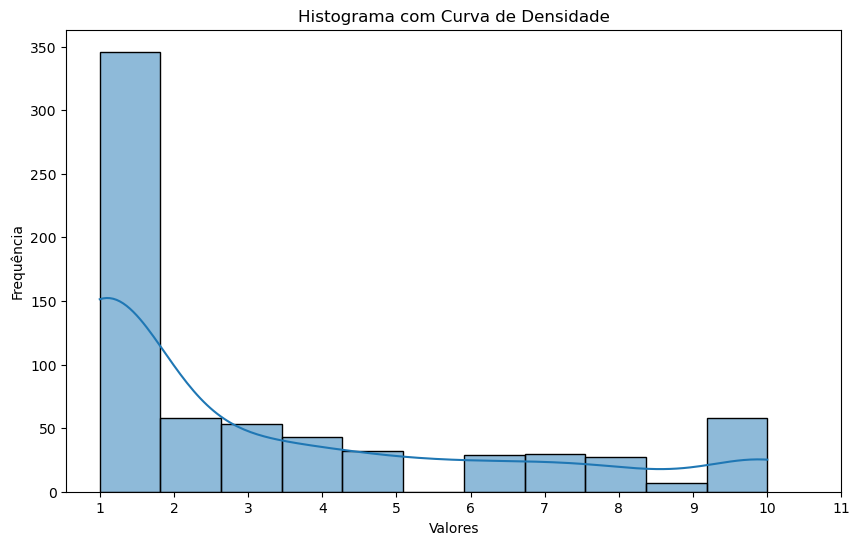

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df2_reduzido['u_cell_shape'], kde=True)  # kde=True adiciona a curva de densidade
plt.title('Histograma com Curva de Densidade')
plt.xlabel('Valores')
plt.ylabel('Frequência')

intervalo = 1
min_chol = int(min(df2_reduzido['u_cell_shape']) // intervalo * intervalo)
max_chol = int((max(df2_reduzido['u_cell_shape']) // intervalo + 1) * intervalo)
plt.xticks(range(min_chol, max_chol + 1, intervalo))
plt.show()

In [87]:
media_shape = np.mean(df2['u_cell_shape'])
mediana_shape = np.median(df2['u_cell_shape'])

valores, contagens = np.unique(df2['u_cell_shape'], return_counts=True)
indice_moda = np.argmax(contagens)
moda = valores[indice_moda]

print(f'Moda: {moda}\nMediana: {mediana_shape}\nMédia: {media_shape}')



Moda: 1
Mediana: 1.0
Média: 3.2152269399707176


Referente ao atributo 'u_cell_shape', nota-se que temos uma distribuição com pico concentrado em torno do 1, não é simétrica (já que moda = mediana < média) e possui uma cauda pesada à direita (justificada pelo valor da média ) 

In [88]:
from scipy.stats import skew

obliquidade = skew(df2['u_cell_shape'])

Obliquidade: 1.16

print(f'Obliquidade: {obliquidade:.2f}')

Obliquidade: 1.16


Nota-se que obtendo um valor positivo da obliquidade do atributo "u_cell_shape", podemos confirmar que a distribuição é assimétrica à direita (cauda maior à direita do que a esquerda). 

A obliquidade (ou assimetria) de um conjunto de dados é uma medida estatística que descreve a inclinação e a direção da assimetria da distribuição dos dados. Um valor de obliquidade positivo indica que a distribuição é assimétrica à direita (a cauda da distribuição se estende mais para a direita do que para a esquerda), enquanto um valor negativo indica que a distribuição é assimétrica à esquerda (a cauda se estende mais para a esquerda).

## Aplicação do PCA
- a) Considerando os 10 atributos originais (sem o atributo classe), reduza a dimensionalidade dos dados usando a técnica PCA, mantendo uma variância acima de 90%. (1 pt)
- b) Quantos componentes são necessários para manter a variância de 90%? (1 pt)

Primeiro devemos verificar s todos os atributos do df são numéricos

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               683 non-null    int64  
 1   clump_thickness  683 non-null    int64  
 2   u_cell_size      683 non-null    int64  
 3   u_cell_shape     683 non-null    int64  
 4   marg_adhesion    683 non-null    int64  
 5   epi_cell_size    683 non-null    int64  
 6   bare_nuclei      683 non-null    float64
 7   bland_chrom      683 non-null    int64  
 8   norm_nucl        683 non-null    int64  
 9   mitoses          683 non-null    int64  
 10  class            683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


Feito isso, vamos separar os atributos em X (df sem a variável alvo) e y (df só com a variável alvo). 

In [93]:
atributos = df2.drop('class', axis=1)
y = df2['class']


In [97]:
pca_var = PCA(n_components=0.9)

df_reduced_var = pca_var.fit_transform(atributos)

df_pca_var = pd.DataFrame(atributos, columns=['Dimensão1','Dimensão2', 'Dimensão3'])
eixos_principais = pca_var.components_

print("Eixos Principais:")
print(eixos_principais)

Eixos Principais:
[[ 1.00000000e+00 -2.56103240e-07 -2.04440669e-07 -2.03307443e-07
  -3.21375374e-07 -1.74237507e-07 -5.82692840e-07 -2.44582828e-07
  -2.49363472e-07 -1.06008998e-07]]


In [95]:
# Normalizar os dados
scaler = StandardScaler()
atributos_normalizados = scaler.fit_transform(atributos)

# Aplicar PCA
pca = PCA(n_components=0.9)  # Manter 90% da variância
atributos_reduzidos = pca.fit_transform(atributos_normalizados)

# Criar um novo DataFrame com os atributos reduzidos
df_reduzido = pd.DataFrame(data=atributos_reduzidos, columns=['Componente Principal ' + str(i+1) for i in range(atributos_reduzidos.shape[1])])

# Agora, df_reduzido contém os dados com dimensionalidade reduzida
df_reduzido

,Componente Principal 1,Componente Principal 2,Componente Principal 3,Componente Principal 4,Componente Principal 5,Componente Principal 6
0,-1.465037,-0.180405,-0.094223,-0.565860,0.019249,-0.150550
1,1.445675,-0.187361,-0.557460,0.236176,0.458304,1.643964
2,-1.588076,-0.171585,-0.066088,0.048646,0.078347,-0.059174
3,1.481801,0.067605,-0.538385,-0.602239,-1.400090,-0.558505
4,-1.340695,-0.164636,-0.080749,0.029714,0.330274,-0.109416
...,...,...,...,...,...,...
678,-1.705940,-0.535040,0.214981,-0.086252,-0.157457,0.415661
679,-2.059942,-0.427648,0.256299,0.181925,-0.128738,0.122457
680,3.796649,0.044273,-0.153311,0.663368,-2.493331,-0.438221
681,2.248368,-0.183603,-1.085455,1.032194,-0.678281,-0.979737


In [99]:
# Determinar o número de componentes necessários para 90% da variância
num_componentes = pca.n_components_

print("Número de Componentes para 90% da Variância:", num_componentes)


Número de Componentes para 90% da Variância: 6


Portanto, precisamos de 6 componentes para manter 90% da variância. 